<a href="https://colab.research.google.com/github/venkiharvgit/csci-e-599a-2024-cybersecurity/blob/main/GraphSimilarity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import networkx as nx
from networkx.algorithms.similarity import graph_edit_distance,optimize_graph_edit_distance

In [2]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Graph Similarity Measure between nf_ToN_iot and nf_BoN_iot**

In [4]:
df_nf_ToN_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-ToN-IoT_chunks')

In [5]:
df_nf_ToN_iot_v1[df_nf_ToN_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


In [ ]:
# No Duplicates Found

In [6]:
df_nf_ToN_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0


In [7]:
df_nf_ToN_iot_v1.shape

(846951, 13)

In [8]:
df_nf_BoT_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT_chunks')

In [9]:
df_nf_BoT_iot_v1[df_nf_BoT_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


**No Duplicates Found**

In [10]:
df_nf_BoT_iot_v1.shape

(510941, 13)

In [11]:
df_nf_BoT_iot_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [12]:
df_nf_BoT_iot_v1=df_nf_BoT_iot_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
#Excluding labels for df_nf_BoT_iot_v1

In [13]:
df_nf_ToN_iot_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
#Excluding labels for df_nf_ToN_iot_v1

In [14]:
df_nf_ToN_iot_v1=df_nf_ToN_iot_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [15]:
G1 = nx.from_pandas_edgelist(df_nf_ToN_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

In [16]:
G2 = nx.from_pandas_edgelist(df_nf_BoT_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

**Graph Edit Distance**

In [17]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
#ged=graph_edit_distance(G1, G2, edge_match=lambda x, y: x.get('PROTOCOL') == y.get('PROTOCOL') and x.get('L7_PROTO') == y.get('L7_PROTO')
 #                        and x.get('IN_BYTES')==y.get('IN_BYTES') and x.get('OUT_BYTES')==y.get('OUT_BYTES') and x.get('IN_PKTS')==y.get('IN_PKTS')
  #                      and x.get('OUT_PKTS')==y.get('OUT_PKTS') and x.get('TCP_FLAGS')==y.get('TCP_FLAGS') and x.get('FLOW_DURATION_MILLISECONDS')==y.get('FLOW_DURATION_MILLISECONDS')
                       #)
#print("Graph Edit Distance:", ged)

Failing due to Memory Issue

**Finding Cosine Similarity for Embeddings Generated from Node2Vec Between Two Graph Set**


1.   df_nf_ToN_iot_v1 and df_nf_BoT_iot_v1
2.   df_nf_ToN_iot_v1 and df_nf_UNSW_NB15





In [18]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity


# Train edge2vec model for graph 1
node2vec_model1 = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings1 = node2vec_model1.fit().wv.vectors

# Train edge2vec model for graph 2
node2vec_model2 = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings2 = node2vec_model2.fit().wv.vectors


# Reshape embeddings for cosine similarity calculation
embeddings1 = embeddings1.reshape(-1, embeddings1.shape[1])
embeddings2 = embeddings2.reshape(-1, embeddings2.shape[1])

print(embeddings1.shape)
print(embeddings2.shape)

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings1, embeddings2)
average_similarity = np.mean(cosine_sim)


#print(embeddings1)

# Print the cosine similarity matrix
print(cosine_sim)

print("average_similarity",average_similarity)


Computing transition probabilities:   0%|          | 0/1501 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/131 [00:00<?, ?it/s]

(1501, 64)
(131, 64)
[[0.2726283  0.18405038 0.19431338 ... 0.12656413 0.21090305 0.21158876]
 [0.69389296 0.74319446 0.73765945 ... 0.38386244 0.7151538  0.7036375 ]
 [0.59995437 0.6124274  0.65615124 ... 0.255044   0.60454184 0.600459  ]
 ...
 [0.6214329  0.6306179  0.6637509  ... 0.30632883 0.61192405 0.6057845 ]
 [0.27568913 0.25813603 0.28296033 ... 0.07755037 0.27605292 0.2582027 ]
 [0.60524935 0.61589456 0.64864814 ... 0.30359295 0.5965399  0.59023553]]
average_similarity 0.46033648


In [19]:
df_nf_UNSW_NB15=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UNSW-NB15_chunks')

In [20]:
df_nf_UNSW_NB15.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0


In [21]:
df_nf_UNSW_NB15.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [22]:
df_nf_UNSW_NB15=df_nf_UNSW_NB15[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [23]:
df_NF_BoT_IoT_v2=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT-v2_chunks')

In [24]:
df_NF_BoT_IoT_v2.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [25]:
df_NF_BoT_IoT_v2=df_NF_BoT_IoT_v2[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [26]:
df_NF_UNSW_NB15_v2=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UNSW-NB15-v2_chunks')

In [27]:
df_NF_UNSW_NB15_v2=df_NF_UNSW_NB15_v2[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [28]:
df_NF_UQ_NIDS_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UQ-NIDS_chunks')

In [29]:
df_NF_UQ_NIDS_v1=df_NF_UQ_NIDS_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [30]:
G3 = nx.from_pandas_edgelist(df_nf_UNSW_NB15, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

In [31]:
# Train edge2vec model for graph 1
node2vec_model1 = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings1 = node2vec_model1.fit().wv.vectors

# Train edge2vec model for graph 2
node2vec_model2 = Node2Vec(G3, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings2 = node2vec_model2.fit().wv.vectors


# Reshape embeddings for cosine similarity calculation
embeddings1 = embeddings1.reshape(-1, embeddings1.shape[1])
embeddings2 = embeddings2.reshape(-1, embeddings2.shape[1])

print(embeddings1.shape)
print(embeddings2.shape)

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings1, embeddings2)
average_similarity = np.mean(cosine_sim)


#print(embeddings1)

# Print the cosine similarity matrix
print(cosine_sim.shape)

print("average_similarity",average_similarity)

Computing transition probabilities:   0%|          | 0/1501 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/44 [00:00<?, ?it/s]

(1501, 64)
(44, 64)
(1501, 44)
average_similarity 0.21138905


**Graph2Vec for Generating Embeddings**

In [34]:
!git clone https://github.com/benedekrozemberczki/graph2vec

Cloning into 'graph2vec'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 332 (delta 47), reused 37 (delta 37), pack-reused 277
Receiving objects: 100% (332/332), 219.49 KiB | 5.78 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [35]:
%cd graph2vec

/content/graph2vec


In [38]:
import os

directory = 'new_data'

# Create the directory
os.makedirs(directory)


**Handle the dataframe to JSON object**

In [39]:
import pandas as pd
import json

features={}
edges=[]

edge_attr={}

for _, row in df_nf_BoT_iot_v1.iterrows():
    edge_list=[]

    edge_list.append(row['IPV4_SRC_ADDR'])
    edge_list.append(row['IPV4_DST_ADDR'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_data1 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/bot_iot_v1.json', 'w') as f:
    json.dump(network_data1, f, indent=4)


In [40]:
df_NF_UNSW_NB15_v2.shape

(2354353, 12)

In [ ]:
#df_NF_UQ_NIDS_v1
features={}
edges=[]

edge_attr={}

for _, row in df_NF_UQ_NIDS_v1.iterrows():
    edge_list=[]

    edge_list.append(row['IPV4_SRC_ADDR'])
    edge_list.append(row['IPV4_DST_ADDR'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/nf_uq_nids_v1.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
#UNSW-NB15-v2
features={}
edges=[]

edge_attr={}

for _, row in df_NF_UNSW_NB15_v2.iterrows():
    edge_list=[]

    edge_list.append(row['IPV4_SRC_ADDR'])
    edge_list.append(row['IPV4_DST_ADDR'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/unsw_nb15_v2.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]

edge_attr={}

for _, row in df_nf_ToN_iot_v1.iterrows():
    edge_list=[]

    edge_list.append(row['IPV4_SRC_ADDR'])
    edge_list.append(row['IPV4_DST_ADDR'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_data = {
    'edges': edges
}

# Write JSON to file
with open('new_data/nf_ToN_iot_v1.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]

edge_attr={}

for _, row in df_nf_UNSW_NB15.iterrows():
    edge_list=[]

    edge_list.append(row['IPV4_SRC_ADDR'])
    edge_list.append(row['IPV4_DST_ADDR'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_data2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/nf_UNSW_NB15_v1.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
!python src/graph2vec.py --input-path new_data/ --output-path features/nci2.csv


Feature extraction started.

100% 5/5 [00:00<00:00, 143.44it/s]

Optimization started.

/content/graph2vec/src/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [2]:
import pandas as pd

embeddings_df=pd.read_csv("features/nci2.csv")
embeddings_df.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,bot_iot_v1,-0.265980,-0.563239,-0.597702,0.668223,0.356970,0.329273,-0.715919,-0.381998,-0.661188,...,0.364824,0.633141,0.625066,0.175319,-0.589093,0.637301,-0.879586,-0.001751,-0.597632,0.077529
1,nf_ToN_iot_v1,-0.383114,-1.038502,-0.693465,0.798841,0.444150,0.472280,-1.080982,-0.571807,-0.681510,...,0.292497,0.845485,0.438063,0.155227,-0.969855,0.544965,-0.937486,-0.040364,-0.572024,-0.070368
2,nf_UNSW_NB15_v1,-0.430681,-1.080795,-0.792291,0.884968,0.462571,0.456667,-1.175922,-0.617698,-0.789479,...,0.323469,0.940809,0.531380,0.223010,-1.032060,0.618026,-1.048223,-0.031221,-0.647783,-0.051921
3,nf_uq_nids_v1,-0.701866,-0.144272,-1.339277,0.936903,0.220331,-0.523872,-0.952584,-0.480351,-1.330729,...,0.397823,0.844222,1.352031,1.167255,-0.306579,1.153091,-0.980730,0.189508,-0.770724,-0.058796
4,unsw_nb15_v2,-0.238016,-0.333679,-0.498436,0.448482,0.167087,0.054335,-0.492887,-0.249944,-0.479826,...,0.195583,0.419834,0.434167,0.315394,-0.319644,0.407922,-0.488361,0.056150,-0.318604,-0.013558


In [ ]:
graph_names= embeddings_df['type'].tolist()

In [ ]:
embeddings_df=embeddings_df.drop('type',axis=1)

In [ ]:
embeddings_df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-0.265980,-0.563239,-0.597702,0.668223,0.356970,0.329273,-0.715919,-0.381998,-0.661188,0.269000,...,0.364824,0.633141,0.625066,0.175319,-0.589093,0.637301,-0.879586,-0.001751,-0.597632,0.077529
1,-0.383114,-1.038502,-0.693465,0.798841,0.444150,0.472280,-1.080982,-0.571807,-0.681510,0.319206,...,0.292497,0.845485,0.438063,0.155227,-0.969855,0.544965,-0.937486,-0.040364,-0.572024,-0.070368
2,-0.430681,-1.080795,-0.792291,0.884968,0.462571,0.456667,-1.175922,-0.617698,-0.789479,0.335049,...,0.323469,0.940809,0.531380,0.223010,-1.032060,0.618026,-1.048223,-0.031221,-0.647783,-0.051921
3,-0.701866,-0.144272,-1.339277,0.936903,0.220331,-0.523872,-0.952584,-0.480351,-1.330729,0.062862,...,0.397823,0.844222,1.352031,1.167255,-0.306579,1.153091,-0.980730,0.189508,-0.770724,-0.058796
4,-0.238016,-0.333679,-0.498436,0.448482,0.167087,0.054335,-0.492887,-0.249944,-0.479826,0.082796,...,0.195583,0.419834,0.434167,0.315394,-0.319644,0.407922,-0.488361,0.056150,-0.318604,-0.013558


In [ ]:
bot_iot_v1_embeddings = embeddings_df.iloc[0].values
nf_ToN_iot_v1_embeddings = embeddings_df.iloc[1].values
nf_UNSW_NB15_v1_embeddings = embeddings_df.iloc[2].values
nf_uq_nids_v1_embeddings = embeddings_df.iloc[3].values
unsw_nb15_v2_embeddings = embeddings_df.iloc[4].values

In [ ]:
# Reshape embeddings to 128 dimensions
bot_iot_v1_embeddings = bot_iot_v1_embeddings.reshape(1, -1)
nf_ToN_iot_v1_embeddings = nf_ToN_iot_v1_embeddings.reshape(1, -1)
nf_UNSW_NB15_v1_embeddings = nf_UNSW_NB15_v1_embeddings.reshape(1, -1)
nf_uq_nids_v1_embeddings=nf_uq_nids_v1_embeddings.reshape(1, -1)
unsw_nb15_v2_embeddings=unsw_nb15_v2_embeddings.reshape(1, -1)

In [ ]:
df_nf_ToN_iot_v1.shape

(846951, 12)

In [ ]:
df_nf_BoT_iot_v1.shape

(510941, 12)

In [ ]:
df_nf_UNSW_NB15.shape

(1593097, 12)

In [ ]:
similarity = cosine_similarity(Bot_graph_embeddings, ToN_graph_embeddings)
print(similarity)

[[0.99334998]]


In [ ]:
similarity = cosine_similarity(Bot_graph_embeddings, nf_UNSW_NB15_embeddings)
print(similarity)

[[0.99905559]]


In [ ]:
similarity = cosine_similarity(ToN_graph_embeddings, nf_UNSW_NB15_embeddings)
print(similarity)

[[0.99141777]]


**Graph Clustering**

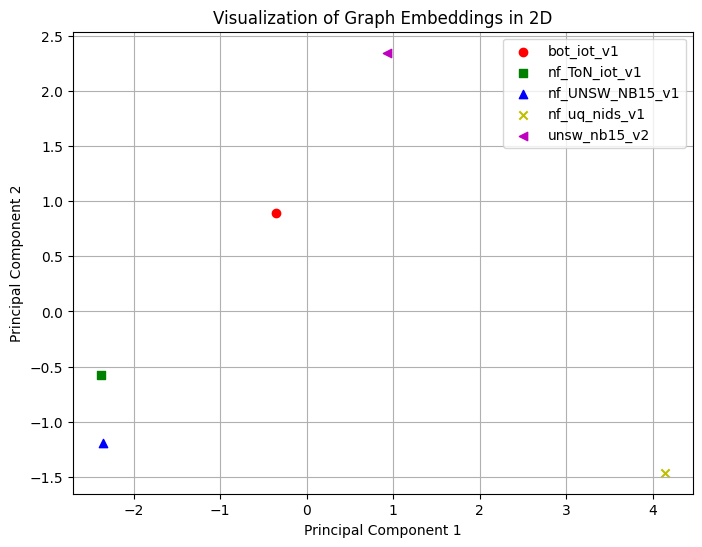

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_df.values)

# Plot the embeddings on a 2D scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b','y','m']  # Define colors for each graph
markers = ['o', 's', '^','x','<']  # Define markers for each graph

for i in range(5):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[i], marker=markers[i], label=graph_names[i])

plt.title('Visualization of Graph Embeddings in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


**nf_ToN_iot_v1 and nf_UNSW_NB15_v1 looks closer in the embedding space.**

In [ ]:
embeddings_2d

array([[-0.34750727,  0.88884673],
       [-2.3754287 , -0.57717487],
       [-2.34864127, -1.19592278],
       [ 4.14108777, -1.4619508 ],
       [ 0.93048946,  2.34620171]])